Линейно конгруэнтный метод.
Для того чтобы линейно конгруэнтный метод генерации псевдослучайных чисел работал корректно и обеспечивал хорошее качество случайных чисел, необходимо соблюдать определенные условия и правила выбора параметров. Вот основные условия и рекомендации:

1) Выбор начального значения (семени): Начальное значение, известное как "семя" (seed), должно быть положительным целым числом и обычно выбирается произвольно. Хорошей практикой является использование разных семян для разных последовательностей случайных чисел, чтобы избежать повторений.

2) Выбор параметров a, c и m:
    *Параметр m (модуль) должен быть большим простым числом. Обычно он выбирается как степень двойки (например, 2^32 или 2^64), чтобы обеспечить хорошую равномерность генерируемых чисел.
    *Параметр a (множитель) должен быть выбран так, чтобы выполнялись условия:
        -0 < a < m (a должно быть положительным и меньше m).
        -gcd(a, m) = 1 (a и m должны быть взаимно простыми числами).
    *Параметр c (приращение) должен быть выбран так, чтобы выполнялось условие:
        0 <= c < m (c должно быть неотрицательным и меньше m).

3) Период генерации (период длины последовательности): Период должен быть максимально длинным, чтобы избежать предсказуемости последовательности чисел. Максимальная длина периода для линейно конгруэнтного метода составляет m, при условии правильного выбора параметров.

4) Проверка равномерности распределения: Генерируемая последовательность должна проходить стандартные статистические тесты на равномерность распределения и случайность. Если она не проходит эти тесты, это может указывать на некорректный выбор параметров.

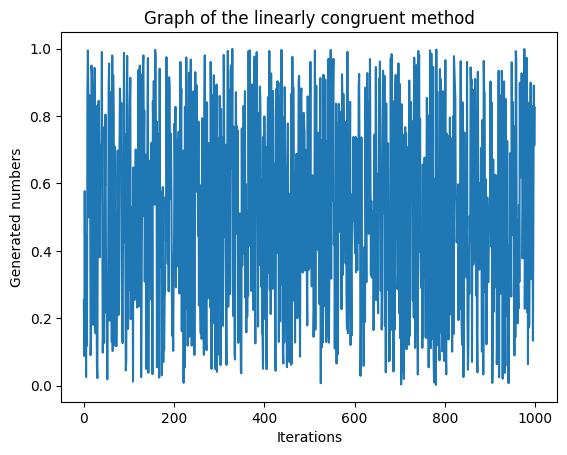

In [16]:
import matplotlib.pyplot as plt

def linear_congruential_generator(seed, a, c, m, n):
    random_numbers = []
    state = seed

    for _ in range(n):
        state = (a * state + c) % m
        random_numbers.append(state / m)

    return random_numbers

seed = 42           #Initial value 
a = 1664525         #factor
c = 1013904223      #Increment
m = 2**32           #Module 
n = 1000            #Number of generated numbers

random_numbers = linear_congruential_generator(seed, a, c, m, n)

plt.plot(random_numbers)
plt.title("Graph of the linearly congruent method")
plt.xlabel("Iterations")
plt.ylabel("Generated numbers")
plt.show()

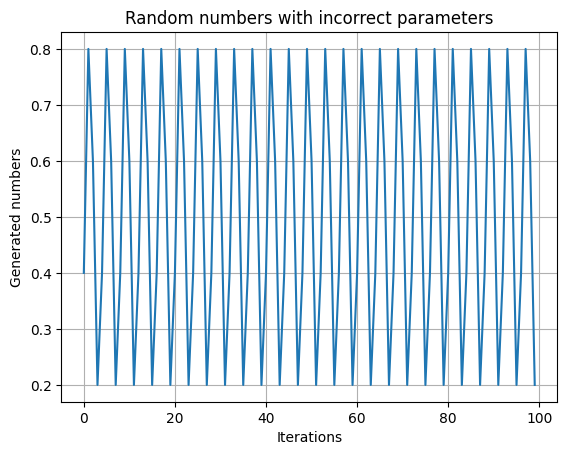

In [17]:
import matplotlib.pyplot as plt

def linear_congruential_generator(seed, a, c, m, n):
    random_numbers = []
    state = seed

    for _ in range(n):
        state = (a * state + c) % m
        random_numbers.append(state / m)

    return random_numbers

seed = 42
a = 7       #Poor choice of multiplier (not mutually simple with m)
c = 0
m = 10      #Small module
n = 100  

random_numbers = linear_congruential_generator(seed, a, c, m, n)

plt.plot(random_numbers)
plt.title("Random numbers with incorrect parameters")
plt.xlabel("Iterations")
plt.ylabel("Generated numbers")
plt.grid(True)
plt.show()

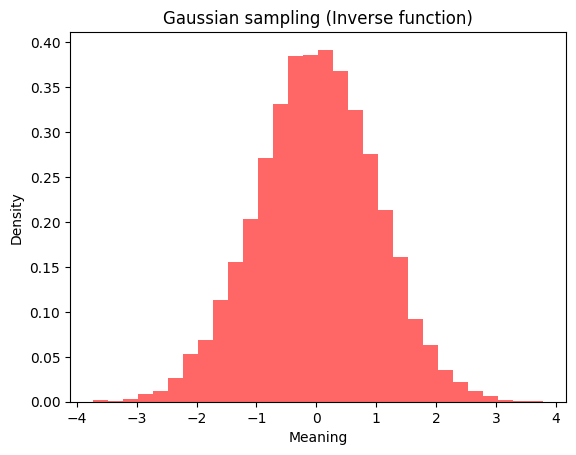

0.0017113685607910156


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
import time

mu = 0
sigma = 1

uniform_samples = np.random.rand(10000)

start = time.time()
z = mu + sigma * np.sqrt(2) * sps.erfinv(1 -  2 * uniform_samples)
end = time.time()
execution_time = end - start

plt.hist(z, bins=30, density=True, alpha=0.6, color='r')
plt.title('Gaussian sampling (Inverse function)')
plt.xlabel('Meaning')
plt.ylabel('Density')
plt.show()
print(execution_time)

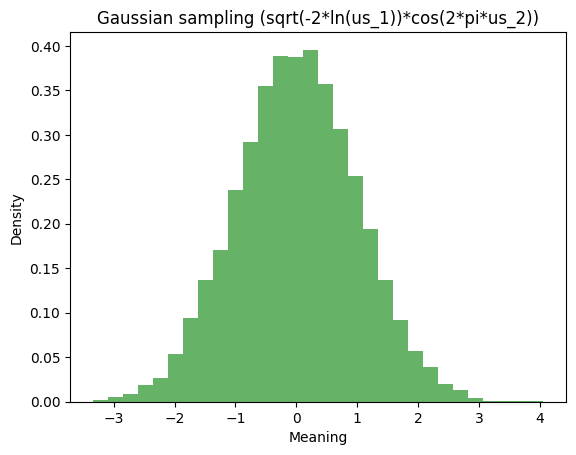

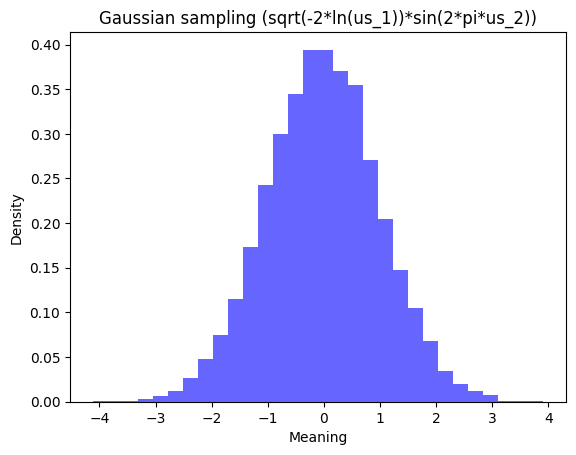

0.001001119613647461


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import time

mu = 0
sigma = 1

us_1 = np.random.rand(10000)
us_2 = np.random.rand(10000)

k  = np.sqrt(-2*np.log(us_1))
p = 2*np.pi
z1 = k*np.cos(p*us_2)
z2 = k*np.sin(p*us_2)

start = time.time()
Z1 = sigma*z1 + mu
Z2 = sigma*z2 + mu
end = time.time()
execution_time = end - start

plt.hist(Z1, bins=30, density=True, alpha=0.6, color='g')
plt.title('Gaussian sampling (sqrt(-2*ln(us_1))*cos(2*pi*us_2))')
plt.xlabel('Meaning')
plt.ylabel('Density')
plt.show()

plt.hist(Z2, bins=30, density=True, alpha=0.6, color='b')
plt.title('Gaussian sampling (sqrt(-2*ln(us_1))*sin(2*pi*us_2))')
plt.xlabel('Meaning')
plt.ylabel('Density')
plt.show()
print(execution_time)


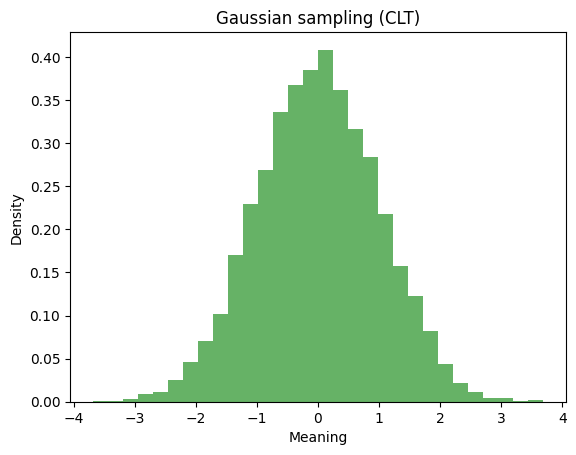

0.17400550842285156


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_normal_samples(n):
    A = []
    n1 = 50
    for _ in range(n):
        us = np.random.rand(n1)
        S = sum(us)
        mu_S = n1 / 2
        sigma_S = np.sqrt(n1 / 12)
        z = (S - mu_S) / sigma_S
        A.append(z)
    return A

n = 10000
start = time.time()
Z = generate_normal_samples(n)
end = time.time()
execution_time = end - start

plt.hist(Z, bins=30, density=True, alpha=0.6, color='g')
plt.title('Gaussian sampling (CLT)')
plt.xlabel('Meaning')
plt.ylabel('Density')
plt.show()
print(execution_time)
